<a href="https://colab.research.google.com/github/mrospond/kik/blob/main/W05_KiK_podstawy_algebraiczne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Potrzebne biblioteki...

# Rysowanie standardowych wykresów
import matplotlib.pyplot as plt
# Obróbka statystyczna przy rysowaniu wykresów i formatowaniu ich wyglądu
import seaborn as sns
sns.set()

# Obliczenia matematyczne, dla nas głównie logarytm
import math

# Praca z wektorami i macierzami
import numpy as np

# Eleganckie formatowanie wyświetlanych danych
import pprint

# Obliczenia symboliczne
## Faktoryzacja liczb
from sympy import factorint
## Sprawdzanie pierwszości
from sympy import isprime
## Obliczanie funkcji φ Eulera (tocjent)
from sympy import totient
from sympy import sieve
## Pierwiastek pierwotny
from sympy import primitive_root

# Obliczanie entropii
from scipy.stats import entropy

# Zliczanie znaków w ciągu
from collections import Counter

# Zliczanie czasu trwania
import time

# Generacja liczb losowych
import random

# Klasy reszt $\mathbb{Z}_n$

In [ ]:
#@title { run: "auto" }
#@markdown Grupa addytywna $\mathbb{Z}_n$

#@markdown Rząd grupy $n$:
n = 5 #@param {type:"integer"}

assert n >= 2, "Wartość minimalna n to dwa!"

print(end='+|\t')
for i in range(n):
  print(i, end='\t')
print()
print("-"*(n*9))

for i in range(n):
  print(i, end='|\t')
  for j in range(n):
    print((i+j)%n, end='\t')
  print()

+|	0	1	2	3	4	
---------------------------------------------
0|	0	1	2	3	4	
1|	1	2	3	4	0	
2|	2	3	4	0	1	
3|	3	4	0	1	2	
4|	4	0	1	2	3	


In [ ]:
#@title { run: "auto" }

#@markdown Element przeciwny w $\mathbb{Z}_n$

#@markdown Element $k$:
k = 2 #@param {type:"integer"}

k1 = int(k) % n

if k1 != k:
  print(f"Element przeciwny do {k} w Z_{n} (czyli do: {k1}) to {-k % n}.")
else:
  print(f"Element przeciwny w Z_{n}: -{k} = {-k % n}.")

Element przeciwny w Z_5: -2 = 3.


Jak to jest liczone? Po prostu:

$$-a = n-a$$

In [ ]:
#@title { run: "auto" }
#@markdown Grupa multiplikatywna $\mathbb{Z}^{\ast}_p$

#@markdown Rząd grupy $n$ (moduł):
p = 7 #@param {type:"integer"}

assert p >= 2 and isprime(p), "Wartość p musi być liczbą pierwszą"

print(end='*|\t')
for i in range(1,p):
  print(i, end='\t')
print()
print("-"*(p*9))

for i in range(1,p):
  print(i, end='|\t')
  for j in range(1,p):
    print((i*j)%p, end='\t')
  print()

*|	1	2	3	4	5	6	
---------------------------------------------------------------
1|	1	2	3	4	5	6	
2|	2	4	6	1	3	5	
3|	3	6	2	5	1	4	
4|	4	1	5	2	6	3	
5|	5	3	1	6	4	2	
6|	6	5	4	3	2	1	


In [ ]:
#@title { run: "auto" }
#@markdown Element odwrotny w $\mathbb{Z}^{\ast}_p$

#@markdown Element $k$:
k = 3 #@param {type:"integer"}

k1 = int(k) % p
assert k1 != 0, "Nie ma elementu odwrotnego do 0"

if k1 != k:
  print(f"Element odwrotny do {k} w Z_{p} (czyli do: {k1}) to {pow(k,-1,p)}.")
else:
  print(f"Element odwrotny do {k} w Z_{p} to: {k}^-1 = {pow(k,-1,p)}.")

Element odwrotny do 3 w Z_7 to: 3^-1 = 5.


Ale jak to jest liczone? A to już nie jest tak trywialne jak w grupie addytywnej...

# Rozszerzony algorytm Euklidesa (EEA)

Tożsamość Bezouta:

$$ax + by = \mathit{gcd}(a,b)$$

Jeśli $a$ i $b$ są względnie pierwsze, tj. $\mathit{gcd}(a,b) = 1$, to z tej tożsamości możemy odczytywać odwrotności: $x = a^{-1} \bmod{b}$ oraz $y = b^{-1} \bmod{a}$.

Oczywiście z liczbą pierwszą $p$ każda liczba od niej niemniejsza (tj. $1,\dots,p-1$) jest względnie pierwsza, dlatego moduł będący liczbą pierwszą gwarantuje, że będziemy mieli odwrotność $\bmod{p}$.

In [ ]:
#@title { run: "auto" }
#@markdown Najpierw zobaczmy, dlaczego algorytm Euklidesa w ogóle jest sprytny...

pier = 1255254 #@param {type:"integer"}
drug = 20900 #@param {type:"integer"}

#@markdown Używany jest dosyć efektywny (ale ponadwielomianowy) algorytm faktoryzacji $\rho$ Pollarda

start = time.time()
s_pier = factorint(pier)
s_drug = factorint(drug)
stop = time.time()

print("Metoda z podstawówki:")
print("*"*100)
print(f"Faktoryzacja {pier} = {s_pier}.")
print(f"Faktoryzacja {drug} = {s_drug}.")

gcd = 1
for k in s_pier:
  if k in s_drug:
    gcd *= k**min(s_pier[k],s_drug[k])

print(f"gcd({pier},{drug}) = {gcd}.")
print("*"*100)
print(f"Faktoryzacja trwała {stop-start}.")

Metoda z podstawówki:
****************************************************************************************************
Faktoryzacja 1255254 = {2: 1, 3: 1, 7: 1, 11: 2, 13: 1, 19: 1}.
Faktoryzacja 20900 = {2: 2, 5: 2, 11: 1, 19: 1}.
gcd(1255254,20900) = 418.
****************************************************************************************************
Faktoryzacja trwała 0.00014281272888183594.


In [ ]:
#@markdown * Rozszerzony algorytm Euklidesa (EEA: _Extended Euclidean Algorithm_)
#@markdown * Można pokazać, że ma złożoność wielomianową

def extended_euclidean(a, b):

    if b == 0:
        return a, 1, 0

    else:
        gcd, x1, y1 = extended_euclidean(b, a % b)
        x = y1
        y = x1 - (a // b) * y1
        return gcd, x, y

In [ ]:
#@markdown Ile to trwa?

start = time.time()
gcd, x, y = extended_euclidean(pier, drug)
stop = time.time()

print(f"Obliczenie z EEA trwało: {stop-start}.")
print(f"gcd({pier},{drug}) = {gcd}.")

Obliczenie z EEA trwało: 6.365776062011719e-05.
gcd(1255254,20900) = 418.


In [ ]:
#@markdown To oczywiście żaden dowód, zróbmy sobie eksperyment

ile = 20
min_l = 10e25
max_l = 10e30

wyn_fact = []
wyn_eea = []
for _ in range(ile):
  pier = random.randint(min_l, max_l)
  drug = random.randint(min_l, max_l)
  print(pier,drug)

  start = time.time()
  gcd, x, y = extended_euclidean(pier, drug)
  stop = time.time()
  wyn_eea.append(stop-start)

  start = time.time()
  s_pier = factorint(pier)
  s_drug = factorint(drug)
  stop = time.time()
  wyn_fact.append(stop-start)
  print(s_pier,s_drug)

print("*"*100)
print(f"Średnia dla faktoryzacji = {sum(wyn_fact)/ile}, średnia dla EEA = {sum(wyn_eea)/ile}.")

201257733231392609951219212916 1963144873761505291534050875806
{2: 2, 3889: 1, 12937627489804101951094061: 1} {2: 1, 3465677: 1, 726367: 1, 389922382273448917: 1}
5942303304776045377303580191008 4434373297208036414360232490176
{2: 5, 3: 3, 11: 1, 21227: 1, 488879: 1, 60250185062936269: 1} {2: 6, 3: 3, 7: 1, 35407: 1, 2040719: 1, 59981: 1, 84587157547: 1}
1124058166015897201655510865559 4538683998280368690236369901422
{107: 1, 60497: 1, 173648552900498688767221: 1} {2: 1, 31397: 1, 1256879261237: 1, 57506672319199: 1}
1112353925175690232438786529162 1439483481650985889834807270652
{2: 1, 37: 1, 16139: 1, 10403831: 1, 89524388129532757: 1} {2: 2, 11: 1, 97: 1, 5303: 1, 443011: 1, 143564194252501433: 1}
1130861323046501696702981642359 6798509149477155723816719000618
{744361921: 1, 1519235859791518938679: 1} {2: 1, 7: 1, 313: 1, 232090037: 1, 6684744542820144527: 1}
8152030795509606082944125721011 5431377431022769123924483301259
{11: 1, 179: 1, 4140188316663080793775584419: 1} {3: 1, 59: 1

To oczywiście dalej nie jest dowód :) ale mamy odpowiednie analizy złożoności...

In [ ]:
#@title { run: "auto" }
#@markdown Zobaczmy EEA w działaniu

a = 12345 #@param {type:"integer"}
b = 11111 #@param {type:"integer"}

assert a>0 and b>0, "Wartości mają być nieujemne!"

gcd, x, y = extended_euclidean(a, b)

print(f"Tożsamość Bezout: {a}*{x} + {b}*{y} = {gcd}")

if a>b:
  a, x, b, y = b, y, a, x

if gcd == 1:
  x1 = x % b
  dodatek = f", czyli {x} mod {b}" if x1 != x else ""
  print(f"Zatem odwrotność {a} w Z_{b} równa się: {x1}{dodatek}.")
  print(f"Jest tak ponieważ {a}*{x1} = {a*x1}, natomiast {a*x1} mod {b} = {(a*x1)%b}.")

Tożsamość Bezout: 12345*-2224 + 11111*2471 = 1
Zatem odwrotność 11111 w Z_12345 równa się: 2471.
Jest tak ponieważ 11111*2471 = 27455281, natomiast 27455281 mod 12345 = 1.


Algorytm EEA uogólnia się do całkiem egzotycznych tworów, np. wielomianów, elementów ciał Galois $\mathit{G}(p^m)$... One nas będą interesować w kontekście kodowania i kryptografii.

In [ ]:
#@title { run: "auto" }
#@markdown Zobaczmy odwrotności w $\mathbb{Z}^{\ast}_n$

#@markdown Rząd grupy $n$ (moduł):
n = 19 #@param {type:"integer"}

assert n >= 2 and isprime(n), "Wartość n musi być liczbą pierwszą"

wartosci = []
for i in range(1,n):
  gcd, x, y = extended_euclidean(i, n)
  odwr = x % n
  print(f"{i}^-1 mod {n} = {odwr}")
  wartosci.append(odwr)

1^-1 mod 19 = 1
2^-1 mod 19 = 10
3^-1 mod 19 = 13
4^-1 mod 19 = 5
5^-1 mod 19 = 4
6^-1 mod 19 = 16
7^-1 mod 19 = 11
8^-1 mod 19 = 12
9^-1 mod 19 = 17
10^-1 mod 19 = 2
11^-1 mod 19 = 7
12^-1 mod 19 = 8
13^-1 mod 19 = 3
14^-1 mod 19 = 15
15^-1 mod 19 = 14
16^-1 mod 19 = 6
17^-1 mod 19 = 9
18^-1 mod 19 = 18


Widać, że jako ciąg wartości występuje tu pewna nieprzewidywalność (jak ją skwantyfikować?). Ten efekt jest jeszcze mocniejszy w przypadku odwrotności w ciele $\mathit{G}(p^m)$, co ma zastosowanie w algorytmie AES.

In [ ]:
#@markdown Entropia ciągu odwrotności

print("Odwrotności: ", wartosci)
roznice = [wartosci[n]-wartosci[n-1] for n in range(1,len(wartosci))]
print("Różnice w ciągu odwrotności: ", roznice)

ile = Counter(roznice)
razem = sum(ile.values())
rozklad = {k: v/razem for k, v in ile.items()}
print(f"Rozkład: {rozklad}")

print(f"Entropia: {entropy(list(rozklad.values()),base=2)} bit.")

Odwrotności:  [1, 10, 13, 5, 4, 16, 11, 12, 17, 2, 7, 8, 3, 15, 14, 6, 9, 18]
Różnice w ciągu odwrotności:  [9, 3, -8, -1, 12, -5, 1, 5, -15, 5, 1, -5, 12, -1, -8, 3, 9]
Rozkład: {9: 0.11764705882352941, 3: 0.11764705882352941, -8: 0.11764705882352941, -1: 0.11764705882352941, 12: 0.11764705882352941, -5: 0.11764705882352941, 1: 0.11764705882352941, 5: 0.11764705882352941, -15: 0.058823529411764705}
Entropia: 3.146286370662104 bit.


# Grupy cykliczne

$\mathbb{Z}_n$ jest grupą cykliczną (co najmniej w sposób trywialny $\langle{1}\rangle = \mathbb{Z}_n$). Ale zobaczmy też na inne opcje:

In [ ]:
#@title { run: "auto" }
#@markdown $\mathbb{Z}_n$ jako grupa cykliczna i rząd elementu w grupie...

#@markdown Rząd grupy $n$ (moduł):
n = 5 #@param {type:"integer"}

#@markdown Element $a$:
a = 3 #@param {type:"integer"}

a = a % n

wyn = 0
rzad = 0
rzad_flaga = True
print(f"a = {a}")
print("-"*2*n)
for i in range(n+5):
  if i>0 and wyn==0 and rzad_flaga:
    rzad_flaga = False
    rzad=i
  print(f"{i}a = {wyn}")
  wyn = (wyn+a) % n

print("-"*2*n)
if rzad<n:
  print(f"Rząd elementu {a} w podgrupie <{a}> to {rzad}.")
else:
  print(f"Rząd elementu {a} w grupie Z_{n} to {rzad}.")

a = 3
----------
0a = 0
1a = 3
2a = 1
3a = 4
4a = 2
5a = 0
6a = 3
7a = 1
8a = 4
9a = 2
----------
Rząd elementu 3 w grupie Z_5 to 5.


In [ ]:
#@title { run: "auto" }
#@markdown $\mathbb{Z}^{*}_p$ jako grupa cykliczna i rząd elementu w grupie...

#@markdown Rząd grupy $p-1$ ($p$: moduł):
p = 7 #@param {type:"integer"}
assert p >= 2 and isprime(p), "Wartość p musi być liczbą pierwszą"

#@markdown Element $a$:
a = 3 #@param {type:"integer"}
a = a % p
assert a > 0, "0 nie należy do grupy Z*_p"

wyn = 1
rzad = 1
rzad_flaga = True
print(f"a = {a}")
print("-"*2*p)
for i in range(p+5):
  if i>0 and wyn==1 and rzad_flaga:
    rzad_flaga = False
    rzad=i   
  print(f"a^{i} = {wyn}")
  wyn = (wyn*a) % p

print("-"*2*p)
if rzad<(n-1):
  print(f"Rząd elementu {a} w podgrupie <{a}> to {rzad}.")
else:
  print(f"Rząd elementu {a} w grupie Z*_{n} to {rzad}.")

a = 3
--------------
a^0 = 1
a^1 = 3
a^2 = 2
a^3 = 6
a^4 = 4
a^5 = 5
a^6 = 1
a^7 = 3
a^8 = 2
a^9 = 6
a^10 = 4
a^11 = 5
--------------
Rząd elementu 3 w grupie Z*_5 to 6.


In [ ]:
#@title { run: "auto" }
#@markdown Grupa multiplikatywna $\mathbb{Z}^{*}_n$ i jej pierwiastek pierwotny

#@markdown Moduł grupy $n$:
n = 7 #@param {type:"integer"}
assert n >= 2, "Wartość n musi być większa od 1"

print(f"Grupa multiplikatywna Z*_{n}:")

grupa_mult_n = []
for i in range(1,n):
  if math.gcd(i,n) == 1:
    grupa_mult_n.append(i)
print(f"{grupa_mult_n} o rzędzie {len(grupa_mult_n)}.")
phi = totient(n)
print(f"Tocjent: φ({n}) = {phi}.\n")

a = primitive_root(n)
print(f"Pierwiastek pierwotny tej grupy to {a}:")
wyn = 1
for i in range(phi):
  print(f"a^{i} = {wyn}")
  wyn = (wyn*a) % n

if a>2:
  print(f"\nNie ma mniejszych pierwiastków pierwotnych, np. dla 2:")
  wyn = 1
  for i in range(phi):
    print(f"2^{i} = {wyn}")
    wyn = (wyn*2) % n

Grupa multiplikatywna Z*_7:
[1, 2, 3, 4, 5, 6] o rzędzie 6.
Tocjent: φ(7) = 6.

Pierwiastek pierwotny tej grupy to 3:
a^0 = 1
a^1 = 3
a^2 = 2
a^3 = 6
a^4 = 4
a^5 = 5

Nie ma mniejszych pierwiastków pierwotnych, np. dla 2:
2^0 = 1
2^1 = 2
2^2 = 4
2^3 = 1
2^4 = 2
2^5 = 4


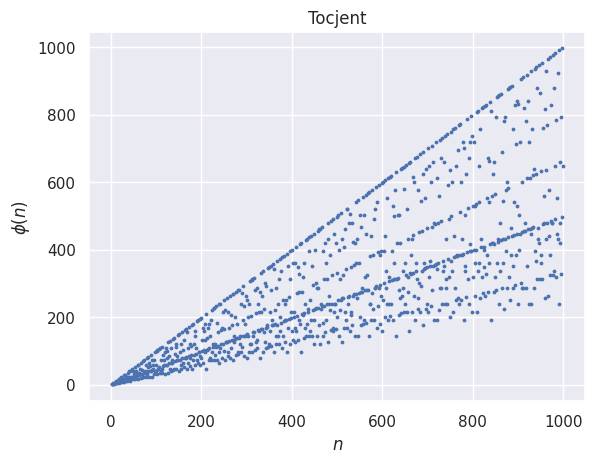

In [ ]:
#@title Tocjent

x_min = 2
x_max = 1000
x = list(range(x_min,x_max))
y = [i for i in sieve.totientrange(x_min,x_max)]

plt.figure()
plt.scatter(x,y,s=3)
plt.title("Tocjent")
plt.xlabel(f"$n$")
plt.ylabel(f"$\phi(n)$")
plt.savefig("tocjent.png")
plt.show()

Skąd te "paski"?

# Rozkład grupy na warstwy względem podgrupy

In [ ]:
#@markdown Grupa addytywna $G = \mathbb{Z}$

zakres_min = -20
zakres_max = 20

grupa_Z = list(range(zakres_min,zakres_max+1))

print("Grupa: ",end="..., ")
for i in grupa_Z:
  print(f"{i}, ",end="")
print("...")
print("*"*200)

Grupa: ..., -20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...
********************************************************************************************************************************************************************************************************


Element neutralny, element przeciwny do $a$?

In [ ]:
#@markdown Podgrupa $H = n\mathbb{Z}$

n = 3 #@param {type: "slider", min:2, max:9, step:1}

podgrupa_n = list(range(zakres_min*n,zakres_max*n+1,n))

print("Podgrupa: ",end="..., ")
for i in podgrupa_n:
  print(f"{i}, ",end="")
print("...")
print("*"*200)

Podgrupa: ..., -60, -57, -54, -51, -48, -45, -42, -39, -36, -33, -30, -27, -24, -21, -18, -15, -12, -9, -6, -3, 0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60, ...
********************************************************************************************************************************************************************************************************


Jest element neutralny i element przeciwny do każdego elementu w podgrupie?

In [ ]:
#@title { run: "auto" }
#@markdown Przykład podwarstwy $g+H$, gdzie $g \in G$ (tj. $g + n\mathbb{Z}$, $g \in \mathbb{Z}$)

g = 7 #@param {type: "slider", min:-20, max:20, step:1}

warstwa = [g + el for el in podgrupa_n]

print(f"Warstwa wyznaczona przez {g}: ",end="..., ")
for i in warstwa:
  print(f"{i}, ",end="")
print("...")
print("*"*200)

Warstwa wyznaczona przez 7: ..., -53, -50, -47, -44, -41, -38, -35, -32, -29, -26, -23, -20, -17, -14, -11, -8, -5, -2, 1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49, 52, 55, 58, 61, 64, 67, ...
********************************************************************************************************************************************************************************************************


Czy każda warstwa tworzy grupę?

In [ ]:
#@markdown Różne warstwy:

for g in range(n+2):
  warstwa = [g + el for el in podgrupa_n]
  print(f"Warstwa wyznaczona przez {g}: ",end="..., ")
  for i in warstwa:
    print(f"{i}, ",end="")
  print("...")
  print("*"*200)

Warstwa wyznaczona przez 0: ..., -60, -57, -54, -51, -48, -45, -42, -39, -36, -33, -30, -27, -24, -21, -18, -15, -12, -9, -6, -3, 0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60, ...
********************************************************************************************************************************************************************************************************
Warstwa wyznaczona przez 1: ..., -59, -56, -53, -50, -47, -44, -41, -38, -35, -32, -29, -26, -23, -20, -17, -14, -11, -8, -5, -2, 1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49, 52, 55, 58, 61, ...
********************************************************************************************************************************************************************************************************
Warstwa wyznaczona przez 2: ..., -58, -55, -52, -49, -46, -43, -40, -37, -34, -31, -28, -25, -22, -19, -16, -13, -10, -7, -4, -1, 2, 5, 8, 11, 14, 17, 20, 23, 26, 29, 32

Widzimy, że $g_1 + n\mathbb{Z} = g_2 + n\mathbb{Z}$, o ile tylko $g_1 = g_2 \bmod{n}$.

Wszystkich różnych podwarstw jest tylko tyle, ile wynosi $n$. Warstwy są rozłączne.

In [ ]:
#@title { run: "auto" }
#@markdown Można też dodawać warstwy, bo one tworzą tzw. grupę ilorazową $[G/H]$, która jest izomorficzna z grupą $\mathbb{Z}_n$

g1 = 5 #@param {type: "slider", min:-20, max:20, step:1}
g2 = 7 #@param {type: "slider", min:-20, max:20, step:1}

gg = [g1,g2,g1+g2]

warstwa = {}
for g in gg:
  warstwa[g] = [g + el for el in podgrupa_n]
  print(f"Warstwa wyznaczona przez {g} (= {g%n} mod-n): ",end="..., ")
  for i in warstwa[g]:
    print(f"{i}, ",end="")
  print("...")
  print("*"*200)

print(f"Wynik dodawania warstwy wyznaczonej przez {g1} i warstwy wyznaczonej przez {g2}:")
print(end="..., ")
for i in range(len(podgrupa_n)):
    print(f"{warstwa[g1][i]+warstwa[g2][i]}, ",end="")
print("...")

Warstwa wyznaczona przez 5 (= 2 mod-n): ..., -55, -52, -49, -46, -43, -40, -37, -34, -31, -28, -25, -22, -19, -16, -13, -10, -7, -4, -1, 2, 5, 8, 11, 14, 17, 20, 23, 26, 29, 32, 35, 38, 41, 44, 47, 50, 53, 56, 59, 62, 65, ...
********************************************************************************************************************************************************************************************************
Warstwa wyznaczona przez 7 (= 1 mod-n): ..., -53, -50, -47, -44, -41, -38, -35, -32, -29, -26, -23, -20, -17, -14, -11, -8, -5, -2, 1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49, 52, 55, 58, 61, 64, 67, ...
********************************************************************************************************************************************************************************************************
Warstwa wyznaczona przez 12 (= 0 mod-n): ..., -48, -45, -42, -39, -36, -33, -30, -27, -24, -21, -18, -15, -12, -9, -6, -3, 0, 3, 6, 9, 12, 15, 18, 

Mamy równość:

$$(g_1 + H) + (g_2 + H) = (g_1 + g_2) + H$$

co świadczy o izomorfizmie grupy ilorazowej $[\mathbb{Z}/n\mathbb{Z}]$ oraz grupy $\mathbb{Z}_n$.

Tak samo można dokonywać rozkładu przestrzeni liniowej względem jej podprzestrzeni, co ma znaczenie z punktu widzenia dekodowania.

# Twierdzenie Fermata-Eulera

In [ ]:
#@title { run: "auto" }
#@markdown Małe tw. Fermata

p = 79 #@param {type:"integer"}
a = 2 #@param {type:"integer"}

assert p >= 2 and isprime(p) and a > 0 and a < p, "Wartość p musi być liczbą pierwszą"

wynik = a**(p-1)
wynik_mod = wynik % p

print(f"{a}^{p-1} = {wynik} mod-{p} = {wynik_mod}.")

2^78 = 302231454903657293676544 mod-79 = 1.


In [ ]:
#@title { run: "auto" }
#@markdown Tw. Fermata-Eulera

n = 72 #@param {type:"integer"}
a = 35 #@param {type:"integer"}

assert n >= 2 and a > 0 and a < n and math.gcd(a, n) == 1, "Wartość a ma być mniejsza od n oraz musi być z nią względnie pierwsza"

phi = totient(n)
print(f"Tocjent: φ({n}) = {phi}.\n")

wynik = a**phi
wynik_mod = wynik % n

print(f"{a}^φ({n}) = {wynik} mod-{n} = {wynik_mod}.")

Tocjent: φ(72) = 24.

35^φ(72) = 11419131242070580387175083160400390625 mod-72 = 1.
